In [1]:
import numpy as np
import pandas as pd

# Task 1

In [13]:
data = pd.read_csv('./kmeans_data/data.csv', header=None)
labels = pd.read_csv('./kmeans_data/label.csv', header=None)

In [245]:
def sse(data, clusters, centers):
    
    s = 0
    for i, c in enumerate(clusters):
        # print(i, c)
        s += (data.iloc[int(c)] - centers[int(c)]) ** 2
    return s.sum()

In [260]:
def distance(x, y, type='euclidean'):
    if type == 'euclidean':
        return (((x - y) ** 2).sum(-1) ** 0.5)
    elif type == 'cosine':
        return -(x * y).sum(-1) / ((x ** 2).sum(-1) ** 0.5) / ((y ** 2).sum(-1) ** 0.5)
    
    elif type == 'jacc':
        return 1 - np.minimum(x, y).sum(-1) / np.maximum(x, y).sum(-1)
    

def kmeans(data, distance, type='euclidean', k=10, stop='no_change', print_j=False):
    data_max = data.max().max()

    clusters = np.zeros(data.shape[0])


    j = 0
    sse_list = []

    while 1:
        if j == 0:
            centers = np.random.rand(k, data.shape[-1]) * data_max
        
        j += 1
        old_centers = centers


        for i, d in data.iterrows():

            r = d.values.reshape(1, -1).repeat(k).reshape(k, -1)

            distance_to_centers = distance(r, centers, type)
            

            cluster = distance_to_centers.argmin()

            clusters[i] = cluster 

        for cluster in range(k):
            where = clusters == cluster
            
            if where.sum() > 0:
 
                centers[cluster] = data.iloc[where].mean()

        sse_now = sse(data, clusters, centers)
        sse_list.append(sse_now)
        if print_j:
            print(j)

        if stop == 'no change':
            if np.abs(old_centers - centers).sum() < 1:
                break

        if stop == 'sse':
            if len(sse_list) > 1:
                if sse_list[-1] >= sse_list[-2]:
                    break

        if stop == 'iter':
            if j > 10:
                break



    return clusters, centers




## Q1

In [243]:
norm_data = data / (data.max() + 1e-8)

euc = kmeans(norm_data, distance, type='euclidean', k=10)
cosine = kmeans(norm_data, distance, type='cosine', k=10)
jacc = kmeans(norm_data, distance, type='jacc', k=10)

dict(zip(('Euclidean', 'Cosine', 'Jaccard'), (sse(norm_data, *euc) ,sse(norm_data, *cosine), sse(norm_data, *jacc))))


/tmp/ipykernel_7558/1456532865.py:5: RuntimeWarning: invalid value encountered in divide
  return -(x * y).sum(-1) / ((x ** 2).sum(-1) ** 0.5) / ((y ** 2).sum(-1) ** 0.5)


{'Euclidean': 571446.5983546398,
 'Cosine': 453854.78072061995,
 'Jaccard': 529461.1222513835}

The cosine metric produces the least sse, and is the best metric in this case

## Q2


In [244]:
def accuracy(labels, clusters):
    preds = np.ones_like(labels) * labels.mode().values
    for c in range(10):
        where = clusters == c
        if where.sum():
            y = labels[where].mode()
            preds[where] = y 

    return (preds == labels.values).mean()

dict(zip(('Euclidean', 'Cosine', 'Jaccard'), (accuracy(labels, euc[0]), accuracy(labels, cosine[0]), accuracy(labels, jacc[0]))))
    

{'Euclidean': 0.2699, 'Cosine': 0.1648, 'Jaccard': 0.3064}

Jaccard gives the highest accuracy and is the best in this case


## Q3

In [264]:
print('no change')
print('Euclidean')
euc = kmeans(norm_data, distance, type='euclidean', k=10, stop='no change', print_j=True)
print('--------------')
print('Cosine')
cosine = kmeans(norm_data, distance, type='cosine', k=10, stop='no change', print_j=True)
print('--------------')
print('Jaccard')
jacc = kmeans(norm_data, distance, type='jacc', k=10, stop='no change', print_j=True)


print('====== sse increases ======')
print('Euclidean')

euc = kmeans(norm_data, distance, type='euclidean', k=10, stop='sse', print_j=True)
print('--------------')
print('Cosine')
cosine = kmeans(norm_data, distance, type='cosine', k=10, stop='sse', print_j=True)
print('--------------')
print('Jaccard')
jacc = kmeans(norm_data, distance, type='jacc', k=10, stop='sse', print_j=True)

print('====== max iter ======')

euc = kmeans(norm_data, distance, type='euclidean', k=10, stop='iter', print_j=True)
print('Euclidean')
print('--------------')
cosine = kmeans(norm_data, distance, type='cosine', k=10, stop='iter', print_j=True)
print('Cosine')
print('--------------')
jacc = kmeans(norm_data, distance, type='jacc', k=10, stop='iter', print_j=True)
print('Jaccard')
print('==============')

no change
Euclidean
1
--------------
Cosine
1
--------------
Jaccard
1
====== sse increases ======
Euclidean
1
2
--------------
Cosine
1
2
--------------
Jaccard
1
2
3
====== max iter ======
1
2
3
4
5
6
7
8
9
10
11
Euclidean
--------------
1
2
3
4
5
6
7
8
9
10
11
Cosine
--------------
1
2
3
4
5
6
7
8
9
10
11
Jaccard


For all three metrics, max iteration (I set at 10) takes the longest to converge

## Q4

In [263]:
print('no change')

euc = kmeans(norm_data, distance, type='euclidean', k=10, stop='no change')
cosine = kmeans(norm_data, distance, type='cosine', k=10, stop='no change')
jacc = kmeans(norm_data, distance, type='jacc', k=10, stop='no change')

print(dict(zip(('Euclidean', 'Cosine', 'Jaccard'), (sse(norm_data, *euc) ,sse(norm_data, *cosine), sse(norm_data, *jacc)))))

print('====== sse increases ======')


euc = kmeans(norm_data, distance, type='euclidean', k=10, stop='sse')

cosine = kmeans(norm_data, distance, type='cosine', k=10, stop='sse')

jacc = kmeans(norm_data, distance, type='jacc', k=10, stop='sse')
print(dict(zip(('Euclidean', 'Cosine', 'Jaccard'), (sse(norm_data, *euc) ,sse(norm_data, *cosine), sse(norm_data, *jacc)))))
print('====== max iter ======')

euc = kmeans(norm_data, distance, type='euclidean', k=10, stop='iter')

cosine = kmeans(norm_data, distance, type='cosine', k=10, stop='iter')

jacc = kmeans(norm_data, distance, type='jacc', k=10, stop='iter')
print(dict(zip(('Euclidean', 'Cosine', 'Jaccard'), (sse(norm_data, *euc) ,sse(norm_data, *cosine), sse(norm_data, *jacc)))))


no change
{'Euclidean': 565813.2300076177, 'Cosine': 453854.78072061995, 'Jaccard': 541521.8530357155}
====== sse increases ======
{'Euclidean': 668676.6294435239, 'Cosine': 453854.78072061995, 'Jaccard': 523579.5470209942}
====== max iter ======
{'Euclidean': 445110.39948522276, 'Cosine': 453854.78072061995, 'Jaccard': 547122.3948305489}


For Euclidean, when the stop criterion is max iteration, we have the least sse
For cosine, the sse is the same regardless of the criterion
For Jaccard, when the criterion for stopping is increase in sse, the sse is the lease

## Q5

Overall, due the problems with random initialization, kmeans cannot achieve very high performance. Using Jaccard gives the highest accuracy, while Cosine gives the minimum sse. Using max iteration for stopping takes the longest while using no change in centers takes the shortest time to converge

# Task 2

In [285]:
from surprise import SVD, Dataset, Reader, KNNBasic
from surprise.model_selection import cross_validate

## 3

In [272]:
ratings = pd.read_csv('archive/ratings_small.csv')
ratings.head(2)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179


In [280]:
reader = Reader(rating_scale=(1, 5))


data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

## Probabilistic Matrix Factorization (PMF)

In [350]:
# svd = SVD()
svd = SVD(n_factors=20, n_epochs=50, lr_all=0.005, reg_all=0.02, biased=False)

cv = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

pmf_rmse, pmf_mae = cv['test_rmse'].mean(), cv['test_mae'].mean()

## User-based Collaborative Filtering

In [351]:
user_based = KNNBasic(sim_options={'user_based': True})
cv = cross_validate(user_based, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

ub_rmse, ub_mae = cv['test_rmse'].mean(), cv['test_mae'].mean()

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


## Item based Collaborative Filtering

In [352]:
item_based = KNNBasic(sim_options={'user_based': False})
cv = cross_validate(item_based, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

ib_rmse, ib_mae = cv['test_rmse'].mean(), cv['test_mae'].mean()

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


Item based gives the lowest average RMSE and MAE

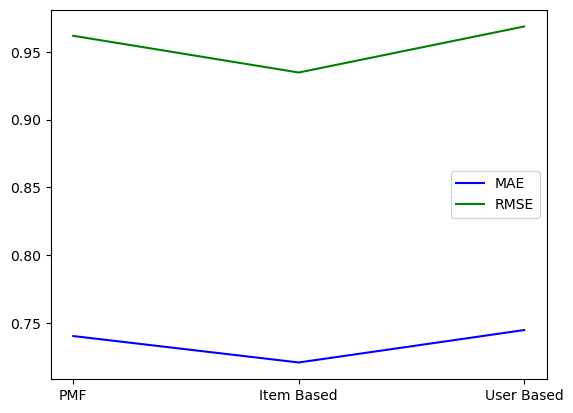

In [354]:
plt.plot(
    ['PMF', 'Item Based', 'User Based'],
    [pmf_mae, ib_mae, ub_mae],
    'b'
)

plt.plot(
    ['PMF', 'Item Based', 'User Based'],
    [pmf_rmse, ib_rmse, ub_rmse],
    'g'
)

plt.legend(['MAE', 'RMSE'])

## e

### User based

In [300]:
user_based = KNNBasic(sim_options={'user_based': True, 'name': 'cosine'})
cv = cross_validate(user_based, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

ub_cosine_rmse = cv['test_rmse'].mean()
ub_cosine_mae = cv['test_mae'].mean()
cv['test_rmse'].mean(), cv['test_mae'].mean()

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


(0.9938321037547514, 0.7675804546363839)

In [301]:
user_based = KNNBasic(sim_options={'user_based': True, 'name': 'pearson'})
cv = cross_validate(user_based, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

ub_pearson_rmse = cv['test_rmse'].mean()
ub_pearson_mae = cv['test_mae'].mean()

cv['test_rmse'].mean(), cv['test_mae'].mean()

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


(0.9973679982646704, 0.7719200776228714)

In [302]:
user_based = KNNBasic(sim_options={'user_based': True, 'name': 'msd'})
cv = cross_validate(user_based, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

ub_msd_rmse = cv['test_rmse'].mean()
ub_msd_mae = cv['test_mae'].mean()


cv['test_rmse'].mean(), cv['test_mae'].mean()

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


(0.9681875155695989, 0.7438652316241303)

### Item based

In [303]:
item_based = KNNBasic(sim_options={'user_based': False, 'name': 'cosine'})
cv = cross_validate(item_based, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

ib_cosine_rmse = cv['test_rmse'].mean()
ib_cosine_mae = cv['test_mae'].mean()

cv['test_rmse'].mean(), cv['test_mae'].mean()

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


(0.994488190466325, 0.7743621673641571)

In [304]:
item_based = KNNBasic(sim_options={'user_based': False, 'name': 'pearson'})
cv = cross_validate(item_based, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

ib_pearson_rmse = cv['test_rmse'].mean()
ib_pearson_mae = cv['test_mae'].mean()

cv['test_rmse'].mean(), cv['test_mae'].mean()

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


(0.9891077446308565, 0.7679815039421423)

In [305]:
item_based = KNNBasic(sim_options={'user_based': False, 'name': 'msd'})
cv = cross_validate(item_based, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

ib_msd_rmse = cv['test_rmse'].mean()
ib_msd_mae = cv['test_mae'].mean()

cv['test_rmse'].mean(), cv['test_mae'].mean()

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


(0.9346399552463287, 0.7213371061137048)

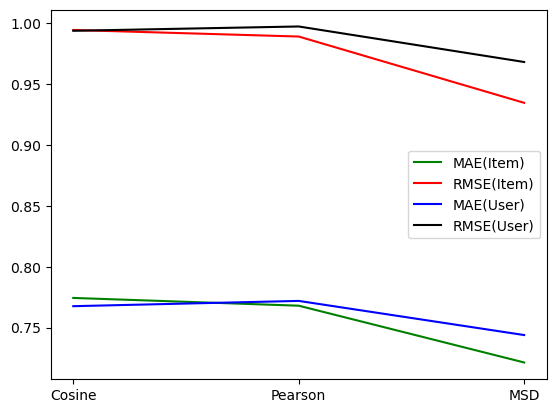

In [336]:
import matplotlib.pyplot as plt


plt.plot(
    ['Cosine', 'Pearson', 'MSD'],
    [ib_cosine_mae, ib_pearson_mae, ib_msd_mae],
    'g'
)

plt.plot(
    ['Cosine', 'Pearson', 'MSD'],
    [ib_cosine_rmse, ib_pearson_rmse, ib_msd_rmse],
    'r'
)

plt.plot(
    ['Cosine', 'Pearson', 'MSD'],
    [ub_cosine_mae, ub_pearson_mae, ub_msd_mae],
    'b'
)

plt.plot(
    ['Cosine', 'Pearson', 'MSD'],
    [ub_cosine_rmse, ub_pearson_rmse, ub_msd_rmse],
    'k'
)

plt.legend(['MAE(Item)', 'RMSE(Item)', 'MAE(User)', 'RMSE(User)'])




## f

In [344]:
ib = dict()
for k in [5, 10, 20, 50]:
    item_based = KNNBasic(k = k, sim_options={'user_based': False, 'name': 'cosine'})
    cv = cross_validate(item_based, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
    ib[f'{k}'] = (cv['test_rmse'].mean(), cv['test_mae'].mean())
    print(cv['test_rmse'].mean(), cv['test_mae'].mean())

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
1.1067693007907213 0.8641170506322295
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
1.0533898778088093 0.8232632206517543
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing th

In [343]:
ub = dict()
for k in [5, 10, 20, 50]:
    user_based = KNNBasic(k = k, sim_options={'user_based': True, 'name': 'cosine'})
    cv = cross_validate(user_based, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
    ub[f'{k}'] = cv['test_rmse'].mean(), cv['test_mae'].mean()
    print(cv['test_rmse'].mean(), cv['test_mae'].mean())

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
1.0414907340600337 0.8043542245703559
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
1.009832995431062 0.777824925078731
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the 

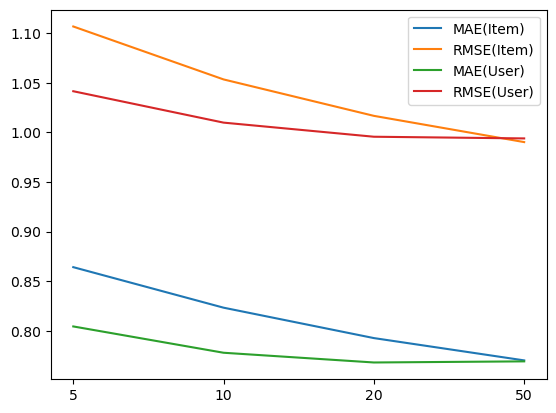

In [355]:
# plt.plot(
#     ['Cosine', 'Pearson', 'MSD'],
#     [ib_cosine_mae, ib_pearson_mae, ib_msd_mae],
#     'g'
# )

# plt.plot(
#     ['Cosine', 'Pearson', 'MSD'],
#     [ib_cosine_rmse, ib_pearson_rmse, ib_msd_rmse],
#     'r'
# )

# plt.plot(
#     ['Cosine', 'Pearson', 'MSD'],
#     [ub_cosine_mae, ub_pearson_mae, ub_msd_mae],
#     'b'
# )

# plt.plot(
#     ['Cosine', 'Pearson', 'MSD'],
#     [ub_cosine_rmse, ub_pearson_rmse, ub_msd_rmse],
#     'k'
# )


plt.plot(ib.keys(), [i[1] for i in ib.values()])
plt.plot(ib.keys(), [i[0] for i in ib.values()])

plt.plot(ub.keys(), [i[1] for i in ub.values()])
plt.plot(ub.keys(), [i[0] for i in ub.values()])

plt.legend(['MAE(Item)', 'RMSE(Item)', 'MAE(User)', 'RMSE(User)'])